In [1]:
# Linear Regression model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [7]:
blast = pd.DataFrame(pd.read_excel('Blast.xlsx'))
blast.columns
blast_baseline = blast['Calculated Hours']
blast = blast.drop(['Vessel ','Area ','Date', 'Exterior', '# of Painters', '# of Shifts', 'Length of Shift', 'Calculated Hours', 'Blast media ', 'Paint system ', 'Existing paint mils ', 'Difficulty ', 'Lessons learned ', 'Adjusted Production Rate'],axis = 1)
blast = blast.dropna()
blast.columns

Index(['Spec', 'SQFT', 'Time taken to blast ', 'Unadjusted Production Rate'], dtype='object')

In [3]:
clean_spec = np.empty((len(blast['Spec']), 1), dtype="S10")
for i, string in enumerate(blast['Spec']):
    if string[0:5] == 'SP-10':
        blast['Spec'][i] = string[0:5]
    elif len(string) > 4:
        blast['Spec'][i] = string[0:4]
    if string[0:3] == "SP6":
        blast['Spec'][i] = "SP-6"

C:\Users\mille\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\mille\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mille\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


RMSE: 83.07
Train Variance score: 0.65


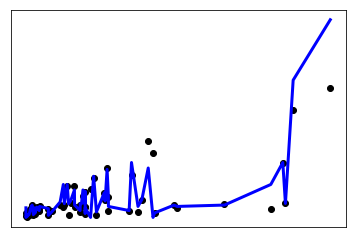

In [7]:
# Compared to their calculations /  baseline model
import collections
Y_hat = blast_baseline
where_na = np.isnan(Y_hat)
Y_hat[where_na] = 0
# RMSE
print("RMSE: %.2f"
      % np.sqrt(mean_squared_error(Y, Y_hat)))

# Variances
print('Train Variance score: %.2f' % r2_score(Y, Y_hat))

#Plot training output
plt.scatter(X, Y, color= 'black')

X.size
dictt = dict(zip(X,Y_hat))
dictt =collections.OrderedDict(sorted(dictt.items()))
X = np.fromiter(dictt.keys(), dtype=float)
Y_hat = np.fromiter(dictt.values(), dtype=float)
plt.plot(X, Y_hat, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

Coefficients: 
 [0.01438526]
 Train RMSE: 114.83
 Test RMSE: 67.39
Train Variance score: 0.43
Test Variance score: -0.03


C:\Users\mille\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\mille\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


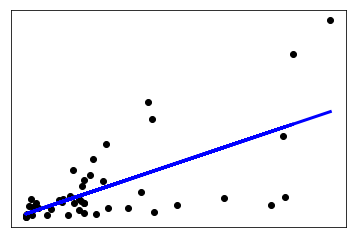

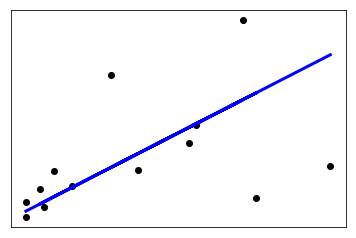

In [6]:
# Mod1: Ind Var: SQFT

X = blast['SQFT']
Y = blast['Time taken to blast ']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
regr = linear_model.LinearRegression()
X_train = X_train.as_matrix()
X_train = X_train.reshape(-1,1)
regr.fit(X_train, Y_train)
X_test = X_test.as_matrix()
X_test  = X_test.reshape(-1,1)
y_pred_test = regr.predict(X_test)
y_pred_train = regr.predict(X_train)

#The coefficients
print('Coefficients: \n', regr.coef_)

# RMSE Train
print(" Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(Y_train, y_pred_train)))

# RMSE Test
print(" Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

# Variances
print('Train Variance score: %.2f' % r2_score(Y_train, y_pred_train))
print('Test Variance score: %.2f' % r2_score(Y_test, y_pred_test))

#Plot training output
plt.scatter(X_train, Y_train, color= 'black')
plt.plot(X_train, y_pred_train, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

# Plot test output
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, y_pred_test, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


In [26]:
frames = [blast['SQFT'], pd.get_dummies(blast['Spec']), blast['Unadjusted Production Rate']]
X = pd.concat(frames, axis=1)
Y = blast['Time taken to blast ']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33)
X_train1 = X_train.drop(columns='Unadjusted Production Rate')
X_test1 = X_test.drop(columns='Unadjusted Production Rate')
regr = linear_model.LinearRegression()
regr.fit(X_train1, Y_train)
y_pred_test = regr.predict(X_test1)
y_pred_train = regr.predict(X_train1)





#The coefficients
print('Coefficients: \n', regr.coef_)

# RMSE Train
print(" Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(Y_train, y_pred_train)))

# RMSE Test
print(" Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

# Variances
print('Train Variance score: %.2f' % r2_score(Y_train, y_pred_train))
print('Test Variance score: %.2f' % r2_score(Y_test, y_pred_test))

Coefficients: 
 [ 1.78388443e-02  8.16976017e+01  2.52671892e+01  5.64767874e+01
  1.95351904e+01  2.12540939e+00 -3.68383613e+01 -3.54248891e+01
  1.08773466e+01  5.25386782e+00 -1.61922713e+02  3.29525710e+01]
 Train RMSE: 76.09
 Test RMSE: 49.14
Train Variance score: 0.77
Test Variance score: 0.70


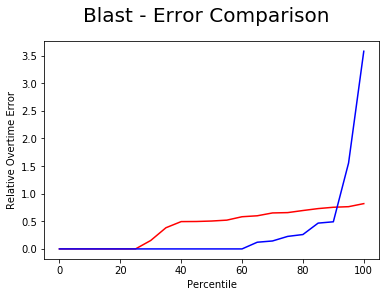

In [28]:
y_predpr = X_test['SQFT']*(1/X_train['Unadjusted Production Rate'].mean())
Y_val = Y_test
y_pred = y_pred_test
predpr_error = list(map(lambda x : max(x,0), Y_val - y_predpr))/Y_val
pred_error = list(map(lambda x : max(x,0), Y_val - y_pred))/Y_val
predpr_error = np.sort(predpr_error)
pred_error = np.sort(pred_error)
f = plt.figure()
#Their model in RED
plt.plot(np.linspace(0,100,len(predpr_error)),predpr_error, color='red')
#Our model in BLUE
plt.plot(np.linspace(0,100,len(pred_error)),pred_error, color='blue')
f.suptitle('Blast - Error Comparison',fontsize=20, y = 1.0)
plt.xlabel('Percentile')
plt.ylabel('Relative Overtime Error')
plt.show()